In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import caffe
import cv2

In [2]:
net=caffe.Net("/home/mady/caffevision/caffe/tutos/tuto1/myconvnet.prototxt",caffe.TEST)

#This “net” object contains two dictionaries — net.blobs and net.params.
#Basically, net.blobs is for data in the layers and net.params is for the weights and biases in the network. 

In [3]:
print "\nnet.inputs =", net.inputs
print "\ndir(net.blobs) =",net.blobs
print "\ndir(net.params) =",net.params

print "\nconv shape = ", net.blobs['conv'].data.shape
print "\ndata shape = ", net.blobs['data'].data.shape

print "\nparams data = ", net.params['conv'][0]#0 for weights 1 for bias


net.inputs = ['data']

dir(net.blobs) = OrderedDict([('data', <caffe._caffe.Blob object at 0x7f6c14716488>), ('conv', <caffe._caffe.Blob object at 0x7f6c14716b90>)])

dir(net.params) = OrderedDict([('conv', <caffe._caffe.BlobVec object at 0x7f6c15891de0>)])

conv shape =  (1, 10, 254, 254)

data shape =  (1, 1, 256, 256)

params data =  <caffe._caffe.Blob object at 0x7f6c3e5b9320>


In [4]:
img=cv2.imread('/home/mady/caffevision/caffe/tutos/tuto1/input/pic1.jpg',0)
img_blobinp = img[np.newaxis, np.newaxis, :, :]
net.blobs['data'].reshape(*img_blobinp.shape)
net.blobs['data'].data[...] = img_blobinp

net.forward()

for i in range(10):
    cv2.imwrite('/home/mady/caffevision/caffe/tutos/tuto1/output/output_image_' + str(i) + '.jpg', 255*net.blobs['conv'].data[0,i])
net.save('myconvmodel.caffemodel')

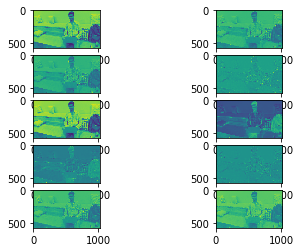

In [5]:

for i in range(10):
    plt.subplot(5,2,1+i)
    plt.imshow(255*net.blobs['conv'].data[0,i])
plt.show()